# Project: Investigate a Dataset of Medical Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Final Conclusions</a></li>
</ul>

<a id='intro'></a>
<br/>

## Introduction

> This is project intends to investigate a dataset with No-show appointment, which is avaiable in Kaggle, in this [link](https://www.kaggle.com/joniarroba/noshowappointments). As we will see in further, there is a relevant percentage of No-show in appointment and, one of the subject is analyze data and try to find out reasons and what could be done to decrease this rate.

In [1]:
#importing libralies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
<br/>

## Data Wrangling


> In this section of the report, it will be loaded data and take a overview. We are looking for inconsistencies, missing and/or duplicate data to trim and clean to set the dataset ready to analysis.  
All manipulation will be described bellow

### General Properties

In [44]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('./data_bases/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Show some statistics information about dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In quick view we found two inconsistencies: **There is no possible that someone with -1 year old. Same for 115 year old, it's strange**.  For now, just keep it on mind to check later.  
Let's see some general information about this dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Theres no missing values in this dataframe, which means less manipulation.

### Vizualizing and Manipulating Data  
>Now that we made a quick view, let's go further and check some features to understand what it is about and determine if is relevant to analysis or not.  
Irrelevant columns will be droped.



In [5]:
#Let's check if we have duplicated appointment in the dataframe

df['AppointmentID'].nunique() == df.shape[0]

True

Before to start netx step, I want do split schedule and appointment into year, month and day (hour could not be useful now) - since these columns are in string format.  
Therefore, it will be created six new columns.

In [6]:
#Create splited columns to scheduled day
df['S_year'] = df['ScheduledDay'].apply(lambda x: x[:4])
df['S_month'] = df['ScheduledDay'].apply(lambda x: x[5:7])

#Create splited columns to appointment day
df['A_year'] = df['AppointmentDay'].apply(lambda x: x[:4])
df['A_month'] = df['AppointmentDay'].apply(lambda x: x[5:7])

#Reorder columns
df = df[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'S_year', 'S_month', 'AppointmentDay',  
    'A_year', 'A_month', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 
    'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 
   ]]


Other point to confirm it's appointment hour - first five record have "00:00:00", so let's check if we have some different values:

In [7]:
#List row wich appointment day contain other value
df[~df['AppointmentDay'].str.contains("00:00:00")]

,PatientId,AppointmentID,Gender,ScheduledDay,S_year,S_month,AppointmentDay,A_year,A_month,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Since there no values different than 00:00:00, this information will not be important to further analysis.  
In this case, I will cut hour from ScheduledDay and AppointmentDay and convert to datatime type:


In [8]:
columns_to_change = ['ScheduledDay', 'AppointmentDay']

for i in columns_to_change:
    df[i] = df[i].apply(lambda x: x[:10]).astype('datetime64')

df[['ScheduledDay', 'AppointmentDay']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ScheduledDay    110527 non-null  datetime64[ns]
 1   AppointmentDay  110527 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


Aditionally, we are create a new colum with timedelta between appointment day and scheduled day to measure waiting time.

In [9]:
df['Waiting_time'] = (df['AppointmentDay'] - df['ScheduledDay'])
df['Waiting_time'].describe()

count                        110527
mean     10 days 04:24:31.828602965
std      15 days 06:07:11.673762786
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: Waiting_time, dtype: object

We have negative values, that's impossible, in data cleaning session we will find and drop these ones.  
Now let's check year and month range of dataset:

In [10]:
year_columns = ['S_year', 'A_year']
month_columns = ['S_month', 'A_month']

for year in year_columns:
        print(year, ':\n', df[year].value_counts().sort_index(), '\n')

for month in month_columns:
    print(month, ':\n',df[month].value_counts().sort_index(), '\n')


S_year :
 2015        62
2016    110465
Name: S_year, dtype: int64 

A_year :
 2016    110527
Name: A_year, dtype: int64 

S_month :
 01       60
02      281
03     3614
04    25339
05    67421
06    13750
11        1
12       61
Name: S_month, dtype: int64 

A_month :
 04     3235
05    80841
06    26451
Name: A_month, dtype: int64 



We have some appointment scheduled in 2015, but all appointment was in 2016, starting in April and ending in June. That means waiting time in day it's going to be greate.  
It's just 62 rows, this sample is too small to be significant, so I will drop these rows and focus analysis in 2016 record.

<br/>

Finally, these columns that contain desease are represented by boolean and I'm not sure if they will be important.  
Just to check, let's see if they have correlation between themselves. To do that, I will add column with No-show, in boolean.

In [11]:
#if No-show are Yes, it's mean the patient missed the appointment
#than in apply function receive the value 1

df['No-show-boolean'] = df['No-show'].apply(lambda x: 1 if x == "Yes" else 0)
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show-boolean
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No-show-boolean,-0.001461,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


No one of these columns has strong correlation, so we can just drop them.  


### Data Cleaning  
First, let's take a look in data with strange ages.  
For strange age, I'm considering age under zero or more than a hundred:

In [12]:
# Locate in the dataset row wich contain age under zero or a hundred
df.loc[(df['Age'] < 0) |
       (df['Age'] > 100)]

,PatientId,AppointmentID,Gender,ScheduledDay,S_year,S_month,AppointmentDay,A_year,A_month,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,No-show-boolean
58014,9.762948e+14,5651757,F,2016-05-03,2016,05,2016-05-03,2016,05,102,CONQUISTA,0,0,0,0,0,0,No,0 days,0
63912,3.196321e+13,5700278,F,2016-05-16,2016,05,2016-05-19,2016,05,115,ANDORINHAS,0,0,0,0,1,0,Yes,3 days,1
63915,3.196321e+13,5700279,F,2016-05-16,2016,05,2016-05-19,2016,05,115,ANDORINHAS,0,0,0,0,1,0,Yes,3 days,1
68127,3.196321e+13,5562812,F,2016-04-08,2016,04,2016-05-16,2016,05,115,ANDORINHAS,0,0,0,0,1,0,Yes,38 days,1
76284,3.196321e+13,5744037,F,2016-05-30,2016,05,2016-05-30,2016,05,115,ANDORINHAS,0,0,0,0,1,0,No,0 days,0
90372,2.342836e+11,5751563,F,2016-05-31,2016,05,2016-06-02,2016,06,102,MARIA ORTIZ,0,0,0,0,0,0,No,2 days,0
97666,7.482346e+14,5717451,F,2016-05-19,2016,05,2016-06-03,2016,06,115,SÃO JOSÉ,0,1,0,0,0,1,No,15 days,0
99832,4.659432e+14,5775010,F,2016-06-06,2016,06,2016-06-06,2016,06,-1,ROMÃO,0,0,0,0,0,0,No,0 days,0


These rows wich age is 115 refers to a single (See the PatientID it's the same for all record).  
Although that seems strange for me, I'll keep those and drop just the row wich age are negative.

In [13]:
#Drop row by index
df.drop(axis=0, index=99832, inplace=True)

In [14]:
#Check quantity of unique patients
df['PatientId'].nunique()

62298

In [15]:
#Check how many Neighbourhood have in dataset
print('This dataset have {} Neibourhood \n'.format(df['Neighbourhood'].nunique()),
      'relative frequence: \n', 
      df['Neighbourhood'].value_counts(normalize=True)*100
     )


This dataset have 81 Neibourhood 
 relative frequence: 
 JARDIM CAMBURI                 6.982068
MARIA ORTIZ                    5.252158
RESISTÊNCIA                    4.009011
JARDIM DA PENHA                3.507772
ITARARÉ                        3.179342
                                 ...   
ILHA DO BOI                    0.031667
ILHA DO FRADE                  0.009048
AEROPORTO                      0.007238
ILHAS OCEÂNICAS DE TRINDADE    0.001810
PARQUE INDUSTRIAL              0.000905
Name: Neighbourhood, Length: 81, dtype: float64


We have great number of neighbourhoods, and they are very distributed in dataset, so we are not going to use them.

<br/>

Finally, let's drop columns that we are not going to use in this analysis.  


In [16]:
df.drop(['AppointmentID', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace=True)
df

,PatientId,Gender,ScheduledDay,S_year,S_month,AppointmentDay,A_year,A_month,Age,SMS_received,No-show,Waiting_time,No-show-boolean
0,2.987250e+13,F,2016-04-29,2016,04,2016-04-29,2016,04,62,0,No,0 days,0
1,5.589978e+14,M,2016-04-29,2016,04,2016-04-29,2016,04,56,0,No,0 days,0
2,4.262962e+12,F,2016-04-29,2016,04,2016-04-29,2016,04,62,0,No,0 days,0
3,8.679512e+11,F,2016-04-29,2016,04,2016-04-29,2016,04,8,0,No,0 days,0
4,8.841186e+12,F,2016-04-29,2016,04,2016-04-29,2016,04,56,0,No,0 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03,2016,05,2016-06-07,2016,06,56,1,No,35 days,0
110523,3.596266e+12,F,2016-05-03,2016,05,2016-06-07,2016,06,51,1,No,35 days,0
110524,1.557663e+13,F,2016-04-27,2016,04,2016-06-07,2016,06,21,1,No,41 days,0
110525,9.213493e+13,F,2016-04-27,2016,04,2016-06-07,2016,06,38,1,No,41 days,0


Drop all appointment scheduled in 2015:

In [17]:
appointment_of_2005 = df.query('`S_year` == "2015"').index
df.drop(appointment_of_2005, axis=0, inplace=True)

In [18]:
df.query('`S_year` == "2015"')

,PatientId,Gender,ScheduledDay,S_year,S_month,AppointmentDay,A_year,A_month,Age,SMS_received,No-show,Waiting_time,No-show-boolean


In [19]:
#Drop all row with negative waiting time
negative_waiting_days = df.query('`Waiting_time` < "0"').index
df.drop(negative_waiting_days, axis=0, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110459 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   PatientId        110459 non-null  float64        
 1   Gender           110459 non-null  object         
 2   ScheduledDay     110459 non-null  datetime64[ns] 
 3   S_year           110459 non-null  object         
 4   S_month          110459 non-null  object         
 5   AppointmentDay   110459 non-null  datetime64[ns] 
 6   A_year           110459 non-null  object         
 7   A_month          110459 non-null  object         
 8   Age              110459 non-null  int64          
 9   SMS_received     110459 non-null  int64          
 10  No-show          110459 non-null  object         
 11  Waiting_time     110459 non-null  timedelta64[ns]
 12  No-show-boolean  110459 non-null  int64          
dtypes: datetime64[ns](2), float64(1), int64(3), object(6), time

<a id='eda'></a>

<br/>

## Exploratory Data Analysis





### First findings
let's extract the firsts information, such as proportion of show-up/no-show and amount of appointment per month.
  
  
<br/>
  
#### Proportion

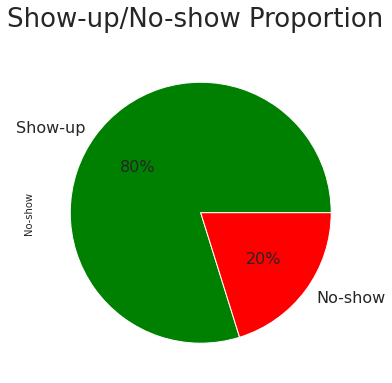

No     88164
Yes    22295
Name: No-show, dtype: int64


In [21]:
sup_nshow = df['No-show'].value_counts()

labels = ['Show-up', 'No-show']
plt.figure(figsize=(6, 6))
plt.suptitle('Show-up/No-show Proportion', fontsize=26)
sup_nshow.plot(
    kind='pie', labels=labels, autopct='%1.f%%', colors=['g', 'r'],
    fontsize=16)
plt.show()
print(sup_nshow)

We have 22,319 no-show appointment, wich represent 20% of all data.  
In the next session we will try to find out the reasons

<br/>

#### Appointments per Month

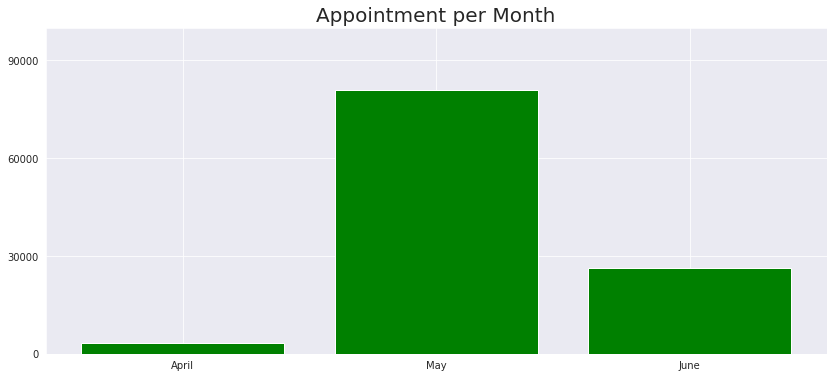

04     3235
05    80799
06    26425
Name: A_month, dtype: int64


In [22]:
#Creating index and Series to plot bar chart
#The series was sort by index to be orded by month
index = ['April', 'May', 'June']
appointment_per_month = df['A_month'].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.title('Appointment per Month', fontsize=20)
plt.bar(index, appointment_per_month, color='g')
plt.ylim(0, 100000)
plt.yticks(np.arange(0, 100000, step=30000))
plt.show()

print(appointment_per_month)

In [23]:
#Query to separate dataframe into show-up and no-show, grouping by appointment month to plot further

n_show = df.query('`No-show` == "Yes"')['A_month'].value_counts().sort_index()
y_show = df.query('`No-show` == "No"')['A_month'].value_counts().sort_index()

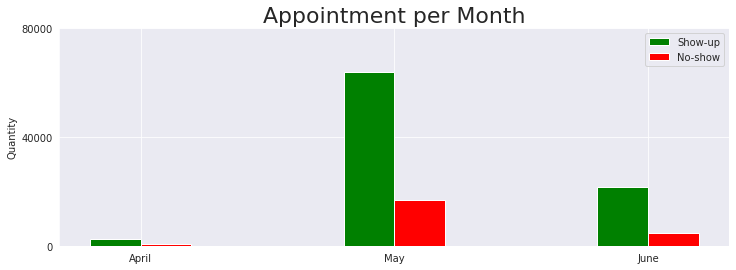

In [24]:
_index = np.arange(len(index))
plt.figure(figsize=(12, 4))
plt.ylim(0, 80000)
plt.title('Appointment per Month', fontsize=22)


plt.bar(_index-0.1, y_show, color='g', width=0.2, align='center')
plt.bar(_index+0.1, n_show, color='r', width=0.2, align='center')


plt.yticks(np.arange(0, 90000, step=40000))
plt.xticks(_index, index)


plt.ylabel('Quantity')
plt.legend(['Show-up', 'No-show'])
plt.show()

#### Patients by gender  

As we can see below, woman represent 65% of patients:



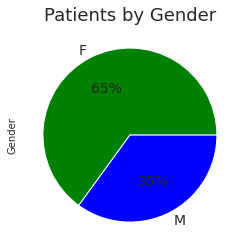

F    71791
M    38668
Name: Gender, dtype: int64


In [25]:
labels = ['Female', 'Male']
gender = df['Gender'].value_counts()

gender.plot(kind='pie', fontsize=14, autopct='%1.f%%', colors=['g', 'b'])
plt.title('Patients by Gender', fontsize=18)
plt.show()

print(gender)

### Research Question 1 - What gender tend to miss more appointment?

<br/>

To Answer that question, it's not fair to use absolute value, since we have much more female record than male. Therefore, it's necessary to divide each value by total of no-show.  
For the record, see below the absolute value.

In [26]:
df.query('`No-show` == "Yes"')['Gender'].value_counts()

F    14580
M     7715
Name: Gender, dtype: int64

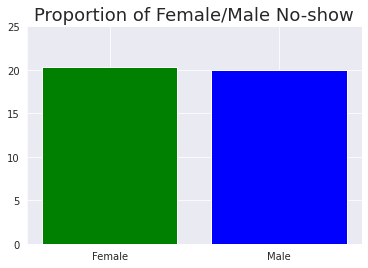

Female proportion: 20.31 
 Male proportion: 19.95


In [27]:
#total of no-show using mask, selecting any column, just to count
female_total = df.query('`Gender` == "F"').shape[0]
male_total = df.query('`Gender` == "M"').shape[0]
total = df.shape[0]

#calculating proportional values 
nshow_female = (df[(df['No-show'] == 'Yes') & (df['Gender'] == 'F')]['Gender'].count() / female_total) * 100
nshow_male = (df[(df['No-show'] == 'Yes') & (df['Gender'] == 'M')]['Gender'].count() / male_total) * 100

plt.ylim(0, 25)
plt.title('Proportion of Female/Male No-show', fontsize=18)
plt.bar('Female', nshow_female, color='g')
plt.bar('Male', nshow_male, color='b')
plt.show()
print('Female proportion: {:.2f} \n Male proportion: {:.2f}'.format(nshow_female, nshow_male))

As we can see woman proportion is slightly higher than man.  
That maybe happens because even calculating separating by gender, proportion are similar:

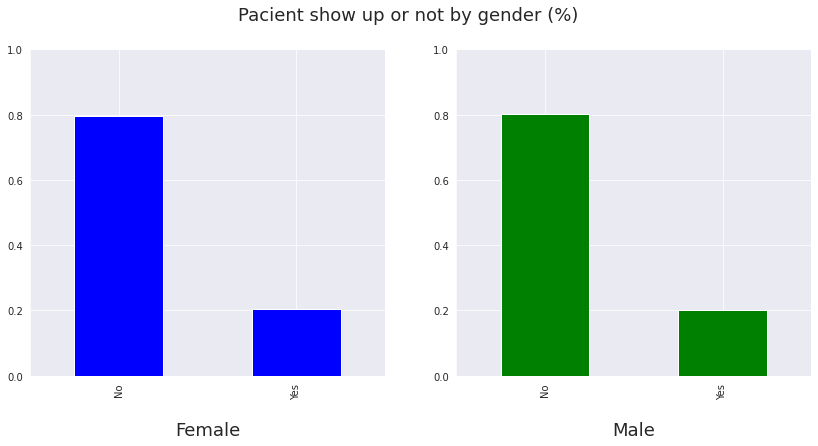

Female: 
 No     0.79691
Yes    0.20309
Name: No-show, dtype: float64 

 Male: 
 No     0.800481
Yes    0.199519
Name: No-show, dtype: float64


In [28]:
female = df.query('Gender == "F"')['No-show'].value_counts(normalize=True)
male = df.query('Gender == "M"')['No-show'].value_counts(normalize=True)

plt.figure(figsize=(14,6))
ticks = np.arange(0, 1.2, 0.2)

plt.suptitle('Pacient show up or not by gender (%)', fontsize=18)

plt.subplot(1, 2, 1)
female.plot(kind="bar", color='b')
plt.title('Female', fontsize=18, y=-0.2)
plt.yticks(ticks)

plt.subplot(1, 2, 2)
male.plot(kind="bar", color='g')
plt.title('Male', fontsize=18, y=-0.2)
plt.yticks(ticks)

plt.show()

# print value of queries
print('Female: \n', female, '\n\n', 'Male: \n', male)

#### Conclusion  

<br/>

Since the differente are insignificant, **we can't affirm wich gender miss more appointment**.

### Research Question 2 - Are SMS reminder efficient to avoid no-show? 

<br/>

In the dataset we have information if patient received sms to reminder about appointment (1 if received and 0 if not).  
To calculate correlation between no-show and sms, we'are going to apply pandas corr function:

In [29]:
df.corr()

,PatientId,Age,SMS_received,No-show-boolean
PatientId,1.000000,-0.004274,-0.009630,-0.001452
Age,-0.004274,1.000000,0.012219,-0.060547
SMS_received,-0.009630,0.012219,1.000000,0.126452
No-show-boolean,-0.001452,-0.060547,0.126452,1.000000


At first there is no strong correlation between sms and no-show, since the value are 0.12.  
Correlation can variate since -1 until 1, values closer in these indicate strong correlation.  
Let's just calculate how efficient was send sms to remind about appointment.


In [30]:
sms_rec = df.query("`SMS_received` == 1").groupby('No-show').count()['Age']
sms_not_received = df.query("`SMS_received` == 0").groupby('No-show').count()['Age']

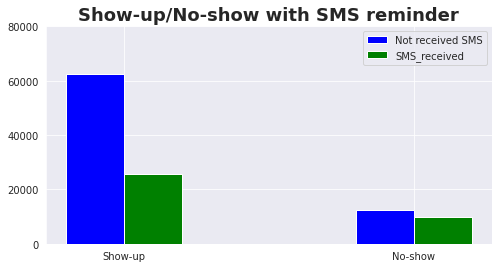

In [31]:
index = ['Show-up', 'No-show']
_index = np.arange(len(index))


font = {
    'size': 18,
    'weight': 'bold',
}

plt.figure(figsize=(8,4))

plt.bar(_index-0.1, sms_not_received, width=0.2, color='b')
plt.bar(_index+0.1, sms_rec, width=0.2, color='g')

plt.ylim(0, 80001)
plt.yticks(np.arange(0, 80001, step=20000))
plt.xticks(_index, index)


plt.title('Show-up/No-show with SMS reminder', fontdict=font)
plt.legend(['Not received SMS', 'SMS_received'])
plt.show()

#### Conclusion  

<br/>

Send SMS **it's not efficient to avoid no-show appointment**.

### Research Question 3 - What's age range miss more appointment?

<br/>

As we saw before, in this dataset we have people from 0 until 115 year. Here, a chart with

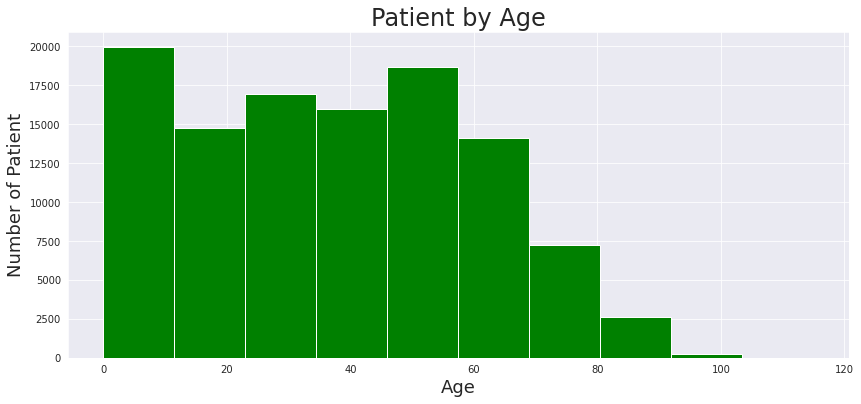

In [32]:
plt.figure(figsize=(14, 6))
plt.hist(df['Age'], color='g')

plt.title('Patient by Age', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Patient', fontsize=18)

plt.show()

To see better how distribute are the age of patient, let's categorize:

In [33]:
#Create labels of age range
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 120, 10)]

#Create a new column and classify age range using pandas cut method.
df['Age_range'] = pd.cut(df['Age'], range(0, 130, 10), right=True, labels=labels)

#age range count
norm_age_range = df['Age_range'].value_counts().sort_index()
norm_age_range

0 - 9        15209
10 - 19      13098
20 - 29      13780
30 - 39      15047
40 - 49      14413
50 - 59      15648
60 - 69      11175
70 - 79       5707
80 - 89       2535
90 - 99        301
100 - 109        2
110 - 119        5
Name: Age_range, dtype: int64

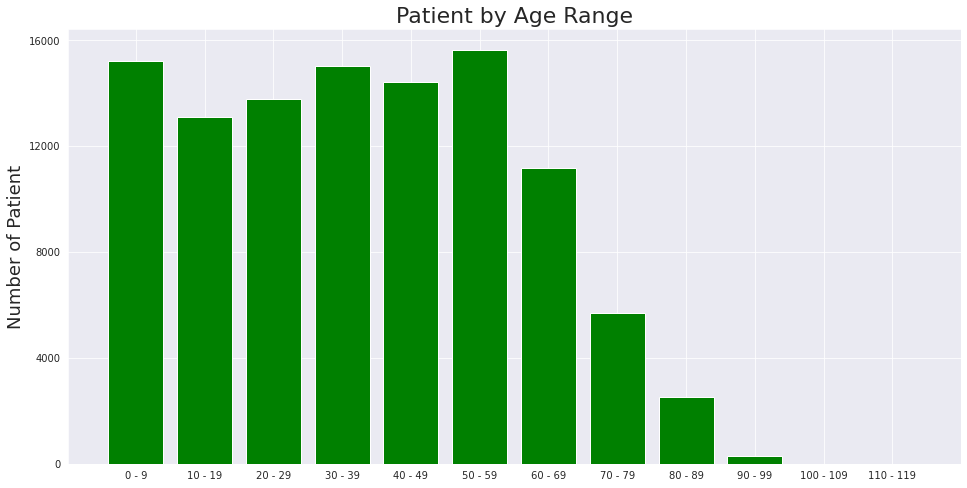

In [34]:
plt.figure(figsize=(16, 8))
plt.bar(labels, norm_age_range, color='g')
plt.title('Patient by Age Range', fontsize=22)
plt.ylabel('Number of Patient', fontsize=18)
plt.yticks(np.arange(0, 16001, step=4000))
plt.show()

Looking this categories, we can see that childrens and teenage represent over 25%. That could be the reason to send sms not be efficient, since most of those persons may not have access to cell phones.  
Now let's plot no-show per age rage

In [35]:
nshow = df.query('`No-show` == "Yes"')
showup = df.query('`No-show` == "No"')

nshow_per_age_rage = nshow.groupby('Age_range').count()['Age']

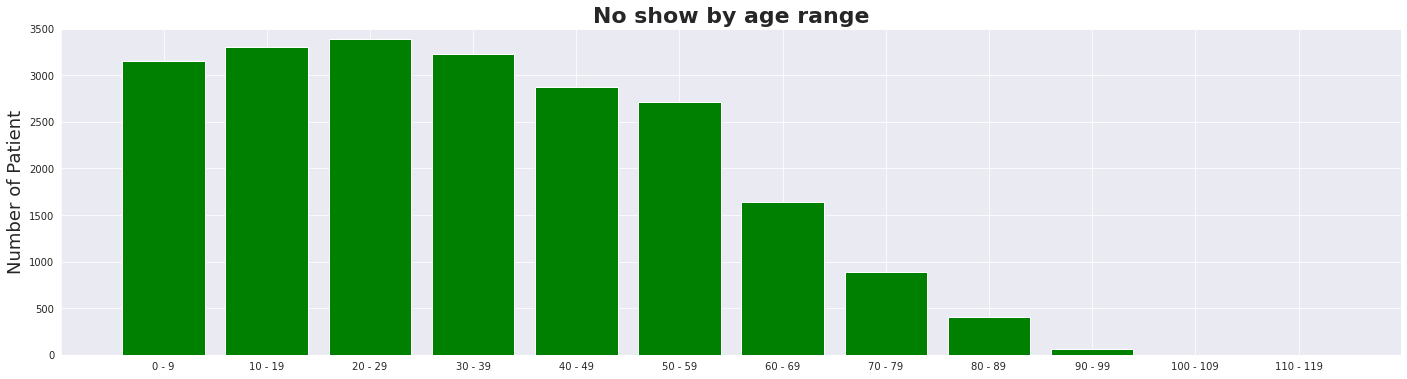

Age_range
0 - 9        3148
10 - 19      3307
20 - 29      3392
30 - 39      3230
40 - 49      2869
50 - 59      2717
60 - 69      1644
70 - 79       884
80 - 89       403
90 - 99        59
100 - 109       0
110 - 119       3
Name: Age, dtype: int64


In [36]:
plt.figure(figsize=(24,6))

plt.bar(labels, nshow_per_age_rage, color='g')
plt.ylim(0, 3500)

plt.title('No show by age range', fontsize=(22), weight='bold')
plt.ylabel('Number of Patient', fontsize=18)
plt.show()

print(nshow_per_age_rage)

Just to know, let's check age range by gender too.

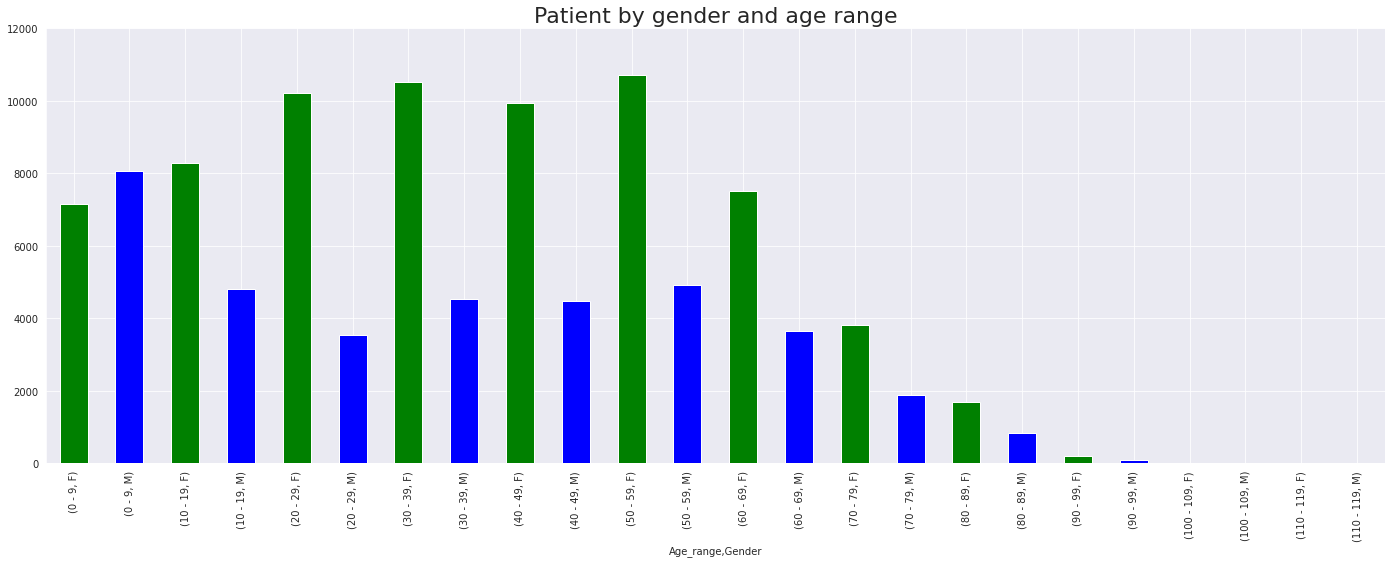

In [37]:
gender_by_age_range = df.groupby(['Age_range', 'Gender']).count()['Age']

plt.figure(figsize=(24, 8))
plt.ylim(0, 12000)
plt.yticks(np.arange(0, 12001, step=2000))
plt.title("")
plt.grid(b=True, which='minor')
gender_by_age_range.plot(kind='bar', color=['g', 'b'])
plt.title('Patient by gender and age range', fontsize=22)
plt.show()

#### Conclusion  

<br/>

Person with age between 20 to 29 miss more appointment than others age range. It's interesting to notice that no-show rate increase until that age range, and after this one rate are decreasing.

### Research Question 4 - Is wainting time related with no show-rate?

<br/>

Firts let's check some information about this column:

In [38]:
df['Waiting_time'].describe()

count                        110459
mean     10 days 02:19:30.222435473
std      14 days 19:16:40.291861651
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               146 days 00:00:00
Name: Waiting_time, dtype: object

In [39]:
#Creating masks to further manipulations
nshow_waiting = df.query('`No-show` == "Yes"')['Waiting_time']
showup_waiting = df.query('`No-show` == "No"')['Waiting_time']

In [40]:
nshow_waiting.describe()

count                         22295
mean     15 days 17:00:22.121551917
std      16 days 00:43:04.432820586
min                 0 days 00:00:00
25%                 4 days 00:00:00
50%                11 days 00:00:00
75%                23 days 00:00:00
max               146 days 00:00:00
Name: Waiting_time, dtype: object

In [41]:
showup_waiting.describe()

count                         88164
mean      8 days 16:16:00.391996733
std      14 days 03:04:08.440778715
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 2 days 00:00:00
75%                12 days 00:00:00
max               133 days 00:00:00
Name: Waiting_time, dtype: object

In [42]:
print('Average waiting time to no show appointment: {} \nAverage waiting time to show up appointment: {}'.format(nshow_waiting.mean(), showup_waiting.mean()))

Average waiting time to no show appointment: 15 days 17:00:22.121551917 
Average waiting time to show up appointment: 8 days 16:16:00.391996733


In [43]:
df.query('`No-show` == "Yes"').shape

(22295, 14)

#### Conclusion  

<br/>

Average waiting time in no show appointment it almost double, so **we can affirm some correlation between no-show and waiting time**

<a id='conclusions'></a>

<br/>

## Final Conclusions

<br/>

In this report, it was analyzed medical appointment and show up/no show rate in 2016. See below some findings:
* No show rate are 20%;
* Send SMS seems to be not very effective to increase this rate;
* That could be because childrens and teenagers (0 - 19 year old) represent 28% of all miss - These pacient may not have cel phone to receive SMS;
* There are more woman appointment than man - woman represent 65% of dataset;
* Despite this proportion, woman and man miss appointment in same proportion;
